In [1]:
import tqdm
import numpy as np

import torch
from torch.utils.data import DataLoader
from torchvision import transforms, datasets

from mnist_loader import MNISTDataset, train_test_split
from autoencoders import SimpleEncoder, SimpleDecoder, AutoEncoder
from functions import train_test_model, plot_images

import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
torch.random.manual_seed(42)

In [3]:
mnist = datasets.MNIST('/home/andrei/datasets') 
# use data and targets only, supports __getitem__, 60000 images 28x28 px

In [4]:
train, test, representations, labels = train_test_split(train_ratio=0.8, mnist=mnist)

In [5]:
image_transforms = transforms.ToTensor()
trainset = MNISTDataset(train, mnist, image_transforms)
testset = MNISTDataset(test, mnist, image_transforms)

In [6]:
trainloader = DataLoader(trainset, shuffle=True, batch_size=128, num_workers=2)
testloader = DataLoader(testset, shuffle=False, batch_size=128, num_workers=2)

In [7]:
encoder = SimpleEncoder(num_features=40)
decoder = SimpleDecoder(num_features=40)

model = AutoEncoder(encoder, decoder)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = torch.nn.BCELoss()

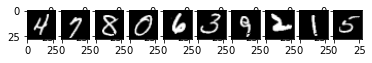

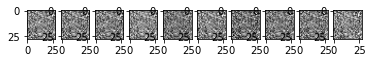

test loss: 65.3639388680458
 Epoch 0, train loss: 96.11750207841396, test loss: 17.036013066768646


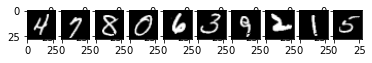

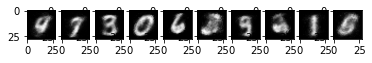

 Epoch 1, train loss: 61.08772526681423, test loss: 13.847156673669815


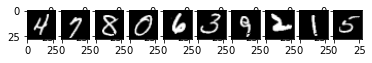

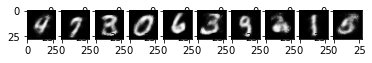

 Epoch 2, train loss: 51.82243502885103, test loss: 12.148867286741734


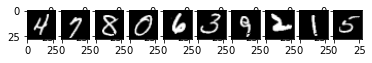

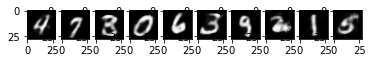

 Epoch 3, train loss: 46.77838446944952, test loss: 11.262157380580902


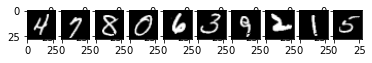

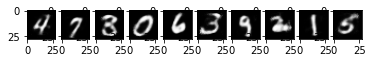

 Epoch 4, train loss: 44.031554348766804, test loss: 10.735264539718628


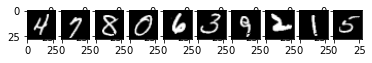

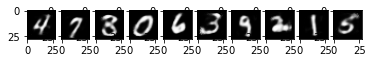

 Epoch 5, train loss: 42.260392986238, test loss: 10.38492464274168
 Epoch 6, train loss: 41.09741099178791, test loss: 10.173862867057323
 Epoch 7, train loss: 40.386240124702454, test loss: 10.030321568250656
 Epoch 8, train loss: 39.982648245990276, test loss: 9.954686403274536
 Epoch 9, train loss: 39.74939611554146, test loss: 9.921482995152473


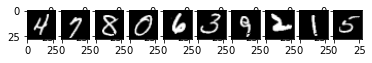

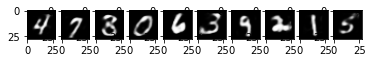

 Epoch 10, train loss: 39.60708384215832, test loss: 9.888452798128128
 Epoch 11, train loss: 39.49853063374758, test loss: 9.86174163967371
 Epoch 12, train loss: 39.41927497088909, test loss: 9.853449396789074
 Epoch 13, train loss: 39.36062669754028, test loss: 9.83274944871664
 Epoch 14, train loss: 39.301093608140945, test loss: 9.83563932031393
 Epoch 15, train loss: 39.25174009799957, test loss: 9.812785871326923
 Epoch 16, train loss: 39.212005503475666, test loss: 9.810084268450737
 Epoch 17, train loss: 39.17765134572983, test loss: 9.79706957936287
 Epoch 18, train loss: 39.13546163588762, test loss: 9.786258339881897
 Epoch 19, train loss: 39.10869362950325, test loss: 9.779906027019024


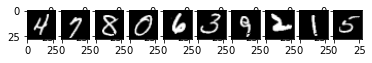

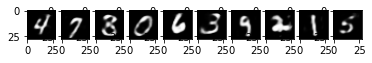

 Epoch 20, train loss: 39.07973679155111, test loss: 9.783567115664482
 Epoch 21, train loss: 39.05671488493681, test loss: 9.774347685277462
 Epoch 22, train loss: 39.03730946779251, test loss: 9.767521508038044
 Epoch 23, train loss: 39.01725013554096, test loss: 9.755169004201889
 Epoch 24, train loss: 39.00188857316971, test loss: 9.757692210376263
 Epoch 25, train loss: 38.98246318846941, test loss: 9.754715330898762
 Epoch 26, train loss: 38.968201510608196, test loss: 9.750940956175327
 Epoch 27, train loss: 38.959504172205925, test loss: 9.75442859530449
 Epoch 28, train loss: 38.951340906322, test loss: 9.748239256441593
 Epoch 29, train loss: 38.93830356001854, test loss: 9.74753788113594


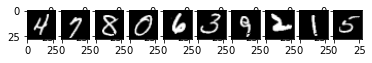

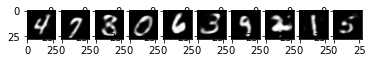

In [9]:
plot_images(representations, model, image_transforms, mnist)
model, optimizer, test_loss = train_test_model(model, optimizer, loss_fn, testloader, "test")

print(f"test loss: {test_loss}")
train_losses = []
test_losses = []
for epoch in range(30):
    model, optimizer, train_loss = train_test_model(model, optimizer, loss_fn, trainloader, "train")
    model, optimizer, test_loss = train_test_model(model, optimizer, loss_fn, testloader, "test")
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    print(f" Epoch {epoch}, train loss: {train_loss}, test loss: {test_loss}")
    
    if epoch < 3 or (epoch + 1) % 10 == 0:
        plot_images(representations, model, image_transforms, mnist)

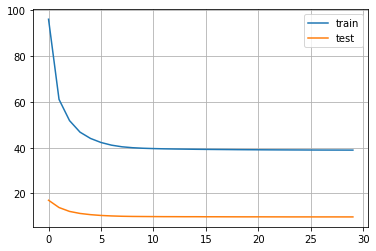

In [10]:
plt.plot(train_losses, label="train")
plt.plot(test_losses, label="test")
plt.grid()
plt.legend()